In [1]:
#import the libraries 

import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import fftpack,signal
import matplotlib
from matplotlib.ticker import ScalarFormatter
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize, ZScaleInterval)
import scipy
import json
import subprocess
import os

from exocrires import spectra_2d
from exocrires import analysis

In [2]:
retrieve=analysis.planet_para()

filenames=glob.glob('/Volumes/G-DRIVE ArmorATD/thesis_ms/models_1683734698/bt-settl/lte*')
filenames=sorted(filenames)

sum_bt_settl=np.zeros((len(filenames),2, 395708))
i=0

for filename in filenames:
    data=np.loadtxt(filename)
    data[:,0]=data[:,0] #angstrom
    
    data_array=np.array((data[:,0], data[:,1]))
    sum_bt_settl[i][0:data_array.shape[0], 0:data_array.shape[1]]=data_array
    
    i+=1
    

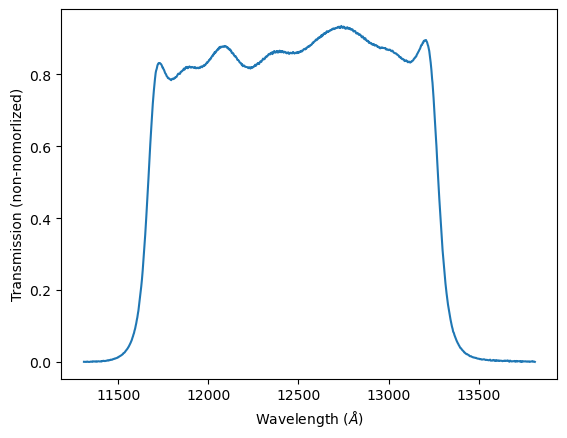

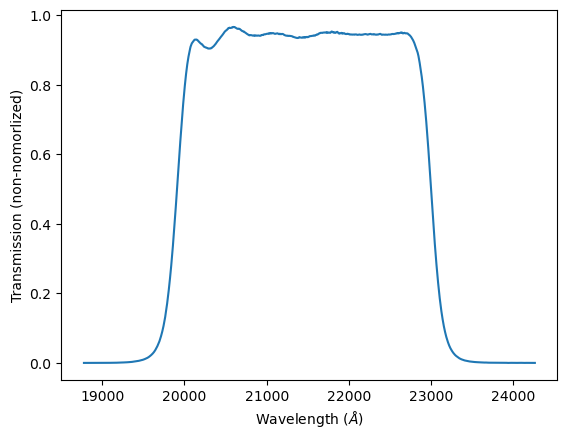

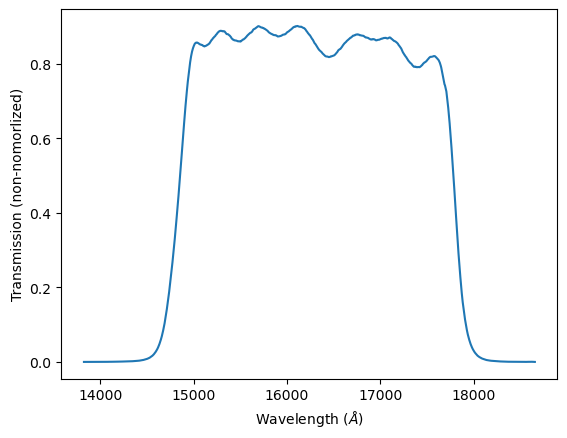

In [3]:
#read the transmission files
#-----J-----
band_j = np.loadtxt('/Volumes/G-DRIVE ArmorATD/thesis_ms/MKO_NSFCam.J.dat',skiprows=1)
#band_j=np.sort(band_j, axis=0)
band_j=np.array((band_j[:,0], band_j[:,1]))
b_j=[band_j[0].min(),band_j[0].max()]

plt.plot(band_j[0], band_j[1])
plt.ylabel('Transmission (non-nomorlized)')
plt.xlabel('Wavelength ($\AA$)')
plt.savefig('./J_trans.png',dpi=150)
plt.show()
#----K-----
band_k = np.loadtxt('/Volumes/G-DRIVE ArmorATD/thesis_ms/MKO_NSFCam.Ks.dat',skiprows=1)
#band_kp=np.sort(band_kp, axis=0)
band_k=np.array((band_k[:,0], band_k[:,1]))
b_k=[band_k[0].min(),band_k[0].max()]

plt.plot(band_k[0], band_k[1])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Transmission (non-nomorlized)')
plt.savefig('./Ks_trans.png',dpi=150)
plt.show()
#----H-----
band_h = np.loadtxt('/Volumes/G-DRIVE ArmorATD/thesis_ms/MKO_NSFCam.H.dat', skiprows=1)
band_h=np.array((band_h[:,0], band_h[:,1]))
b_h=[band_h[0].min(),band_h[0].max()]

plt.plot(band_h[0], band_h[1])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Transmission (non-nomorlized)')
plt.savefig('./h_trans.png',dpi=150)
plt.show()

# Retrieve the apparent magnitude of planets based on the host-star magnitude and detected/non-detected flux limit

In [4]:
c_list_j_k=np.zeros(len(sum_bt_settl))
c_list_h_k=np.zeros(len(sum_bt_settl))

#--flux contrast at different bands--#
p_s_j = 1.72e-5 #J band
p_s_j_err = 6.16e-6

p_s_h2 = 1.93e-5
p_s_h2_err = 1.17e-5

p_s_k12 = 5.1e-5  # K band not detectable with SPHERE in 3 sigma

#--apparent magnitude of the host star--#
m_s_j = 7.31 #J band
m_s_k = 6.41 #K band
m_s_h = 6.91 #H band 



m_p_j=retrieve.mag_convert(flux_ratio=p_s_j, stellar_mag=m_s_j, error_b=p_s_j_err, error_p=p_s_j_err)

m_p_h=retrieve.mag_convert(flux_ratio=p_s_h2, stellar_mag=m_s_h, error_b=p_s_h2_err, error_p=p_s_h2_err)

m_p_k=retrieve.mag_convert(flux_ratio=p_s_k12, stellar_mag=m_s_k)

#zero-point flux 
c=scipy.constants.speed_of_light

zero_flux_j=2.983e-10 #(erg/cm2/s/A)
zero_flux_k=4.36e-11 #(erg/cm2/s/A)
zero_flux_h=1.17782e-10 #(erg/cm2/s/A)



#j-k
for i in range(0,len(sum_bt_settl)):
    
    retrieve.data_planet=sum_bt_settl[i]

    c=retrieve.color_index(band1_w=b_j, band2_w=b_k, transmission1=band_j, transmission2=band_k,\
                    zero1=zero_flux_j, zero2=zero_flux_k) #J-K
    
    c_list_j_k[i]=c[0]
    
    
#h-k
for i in range(0,len(sum_bt_settl)):
    
    retrieve.data_planet=sum_bt_settl[i]

    c=retrieve.color_index(band1_w=b_h, band2_w=b_k, transmission1=band_h, transmission2=band_k,\
                    zero1=zero_flux_h, zero2=zero_flux_k) #H-K
    
    c_list_h_k[i]=c[0]

/Users/richard/opt/anaconda3/lib/python3.9/site-packages/exocrires/analysis.py:64: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_1=np.array([self.data_planet[0][mask_1],self.data_planet[1][mask_1]])
/Users/richard/opt/anaconda3/lib/python3.9/site-packages/exocrires/analysis.py:67: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_2=np.array([self.data_planet[0][mask_2],self.data_planet[1][mask_2]])


In [5]:
font = {'size': 8}
plt.rcParams.update({'font.size': font['size']})

parameter=np.zeros((55,3))


i=0
for j in filenames:
    parameter[i,0]=(int(j[-29:-27])*100)
    parameter[i,1]=(float(j[-26:-23]))
    parameter[i,2]=(float(j[-22:-19]))
    
    i+=1

/var/folders/w_/fqznltwj2pz2y345p5_rzn3r0000gn/T/ipykernel_14085/336491924.py:30: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ax1.plot(parameter[mask_g][:,0], -c_list_j_k[mask_g]+ m_p_j[1], c=cc)
/var/folders/w_/fqznltwj2pz2y345p5_rzn3r0000gn/T/ipykernel_14085/336491924.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ax1.scatter(parameter[mask_g][:,0], -c_list_j_k[mask_g]+ m_p_j[1], alpha=0.6, label='log g = %s'%x, c=cc)
/var/folders/w_/fqznltwj2pz2y345p5_rzn3r0000gn/T/ipykernel_14085/336491924.py:32: FutureWarning: Using a non-tup

<Figure size 1000x500 with 0 Axes>

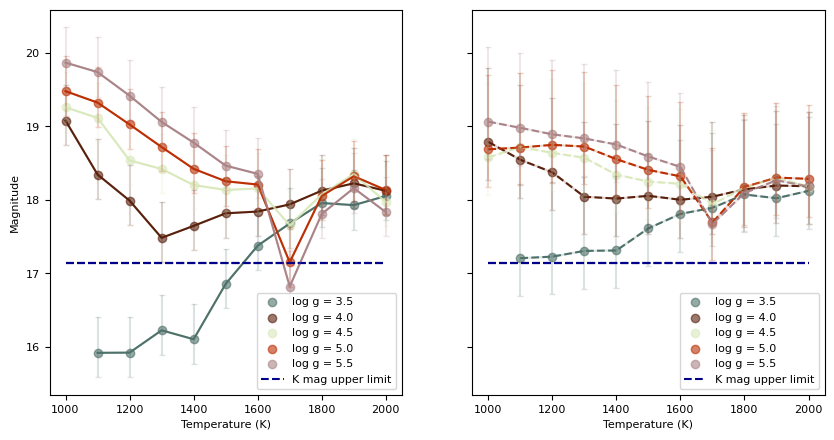

In [6]:
fig=plt.figure(figsize=(10,5))
m_p_j=np.around(m_p_j,3)
m_p_j_err = np.array([m_p_j[1]-m_p_j[2], m_p_j[0]-m_p_j[1]])

m_p_j_errN =np.tile(m_p_j_err, (55, 1)).T

m_p_k=np.around(m_p_k,3)

mag_k_es_j=-c_list_j_k+m_p_j[1]

#-----
m_p_h=np.around(m_p_h,3)
m_p_h_err = np.array([m_p_h[1]-m_p_h[2], m_p_h[0]-m_p_h[1]])

m_p_h_errN =np.tile(m_p_h_err, (55, 1)).T

m_p_k=np.around(m_p_k,3)

mag_k_es_h=-c_list_h_k+m_p_h[1]

fig, axes=plt.subplots(1,2, figsize=(10,5), sharey=True)


for x in np.arange(3.5,6,0.5):
    
    cc=np.random.rand(1,3)
    
    ax1=axes[0]
    mask_g=[(parameter[:,1]==x)]#&(parameter[:,0]!=2000)]
    ax1.plot(parameter[mask_g][:,0], -c_list_j_k[mask_g]+ m_p_j[1], c=cc)
    ax1.scatter(parameter[mask_g][:,0], -c_list_j_k[mask_g]+ m_p_j[1], alpha=0.6, label='log g = %s'%x, c=cc)
    yerror=m_p_j_errN[:,0:len(parameter[mask_g])]
    ax1.errorbar(parameter[mask_g][:,0], -c_list_j_k[mask_g]+m_p_j[1], yerr=yerror, alpha=0.2, capsize=2, c=cc)
    
    
    ax2=axes[1]
    ax2.plot(parameter[mask_g][:,0], -c_list_h_k[mask_g]+ m_p_h[1], ls='--', c=cc)
    ax2.scatter(parameter[mask_g][:,0], -c_list_h_k[mask_g]+ m_p_h[1], alpha=0.6, label='log g = %s'%x, c=cc)
    yerror=m_p_h_errN[:,0:len(parameter[mask_g])]
    ax2.errorbar(parameter[mask_g][:,0], -c_list_h_k[mask_g]+m_p_h[1], yerr=yerror, alpha=0.2, capsize=2, c=cc)
    
    
ax1.hlines(y=m_p_k, xmin=parameter[mask_g][:,0][0], xmax=parameter[mask_g][:,0][-1], ls='--', label='K mag upper limit', colors='darkblue')
ax2.hlines(y=m_p_k, xmin=parameter[mask_g][:,0][0], xmax=parameter[mask_g][:,0][-1], ls='--', label='K mag upper limit', colors='darkblue')
#plt.hlines(y=m_p_j[1], xmin=parameter[mask_g][:,0][0], xmax=parameter[mask_g][:,0][-1], ls='--', label='J mag', colors='gray')

ax1.set_xlabel('Temperature (K)')
ax2.set_xlabel('Temperature (K)')
ax1.set_ylabel('Magnitude')

ax1.legend(loc='lower right')
ax2.legend(loc='lower right')

plt.savefig('/Volumes/G-DRIVE ArmorATD/thesis_ms/2411/color_index.png', dpi=200)
plt.show()

mag_estimate=pd.DataFrame(data={'T':parameter[:,0],'log_g':parameter[:,1],'metallicity':parameter[:,2],'color_hk':c_list_h_k, 'mag_ks_h':mag_k_es_h,'color_jk':c_list_j_k, 'mag_ks_j':mag_k_es_j})
mag_estimate.to_csv('/Volumes/G-DRIVE ArmorATD/thesis_ms/2411/mag_estimate.csv')

# Plot color-T diagram

/var/folders/w_/fqznltwj2pz2y345p5_rzn3r0000gn/T/ipykernel_14085/3715762651.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ax1.plot(parameter[mask_g][:,0], mag_estimate.loc[mag_estimate.index[mask_g], 'color_jk'], c=cc)
/var/folders/w_/fqznltwj2pz2y345p5_rzn3r0000gn/T/ipykernel_14085/3715762651.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ax1.scatter(parameter[mask_g][:,0], mag_estimate.loc[mag_estimate.index[mask_g], 'color_jk'], alpha=0.6, label='log g = %s'%x, c=cc)
/var/folders/w_/fqznltwj2pz2y345p5_rzn3r0000gn/T/ipykern

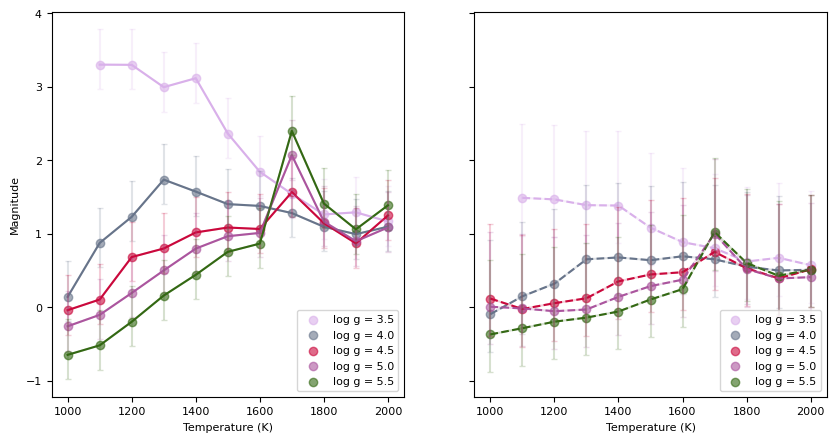

In [22]:
fig, axes=plt.subplots(1,2, figsize=(10,5), sharey=True)


for x in np.arange(3.5,6,0.5):
    
    cc=np.random.rand(1,3)
    
    ax1=axes[0]
    mask_g=[(mag_estimate.log_g==x)]#&(parameter[:,0]!=2000)]
    ax1.plot(parameter[mask_g][:,0], mag_estimate.loc[mag_estimate.index[mask_g], 'color_jk'], c=cc)
    ax1.scatter(parameter[mask_g][:,0], mag_estimate.loc[mag_estimate.index[mask_g], 'color_jk'], alpha=0.6, label='log g = %s'%x, c=cc)
    yerror=m_p_j_errN[:,0:len(parameter[mask_g])]
    ax1.errorbar(parameter[mask_g][:,0], mag_estimate.loc[mag_estimate.index[mask_g], 'color_jk'], yerr=yerror, alpha=0.2, capsize=2, c=cc)
    
    
    ax2=axes[1]
    ax2.plot(parameter[mask_g][:,0], mag_estimate.loc[mag_estimate.index[mask_g], 'color_hk'], ls='--', c=cc)
    ax2.scatter(parameter[mask_g][:,0], mag_estimate.loc[mag_estimate.index[mask_g], 'color_hk'], alpha=0.6, label='log g = %s'%x, c=cc)
    yerror=m_p_h_errN[:,0:len(parameter[mask_g])]
    ax2.errorbar(parameter[mask_g][:,0], mag_estimate.loc[mag_estimate.index[mask_g], 'color_hk'], yerr=yerror, alpha=0.2, capsize=2, c=cc)
    
    
#ax1.hlines(y=m_p_k, xmin=parameter[mask_g][:,0][0], xmax=parameter[mask_g][:,0][-1], ls='--', label='K mag upper limit', colors='darkblue')
#ax2.hlines(y=m_p_k, xmin=parameter[mask_g][:,0][0], xmax=parameter[mask_g][:,0][-1], ls='--', label='K mag upper limit', colors='darkblue')
#plt.hlines(y=m_p_j[1], xmin=parameter[mask_g][:,0][0], xmax=parameter[mask_g][:,0][-1], ls='--', label='J mag', colors='gray')

ax1.set_xlabel('Temperature (K)')
ax2.set_xlabel('Temperature (K)')
ax1.set_ylabel('Magnitude')

ax1.legend(loc='lower right')
ax2.legend(loc='lower right')

plt.savefig('/Volumes/G-DRIVE ArmorATD/thesis_ms/2411/color_T.png', dpi=200)
plt.show()